In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


rows1 = 307511, cols1 = 122
rows2 = 8602, cols2 = 123
rows3 = 8602, cols3 = 9
                                   Mean  Median    Mode     Min Max   Range  \
FLAG_DOCUMENT_20             0.00104627       0       0       0   1       1   
LIVINGAPARTMENTS_MODE          0.109362  0.0808  0.0735       0   1       1   
FLAG_DOCUMENT_8                0.204139       0       0       0   1       1   
FLAG_EMAIL                     0.125668       0       0       0   1       1   
FLAG_DOCUMENT_3                0.653569       1       1       0   1       1   
FLAG_DOCUMENT_18             0.00999767       0       0       0   1       1   
FLOORSMIN_MEDI                 0.242391  0.2083  0.2083       0   1       1   
YEARS_BEGINEXPLUATATION_AVG    0.982611  0.9831  0.9866  0.4903   1  0.5097   
FLAG_EMP_PHONE                 0.999767       1       1       0   1       1   

                            Quartiles     Variance       S.D.  
FLAG_DOCUMENT_20                    0    0.0010453   0.032331  
LIV

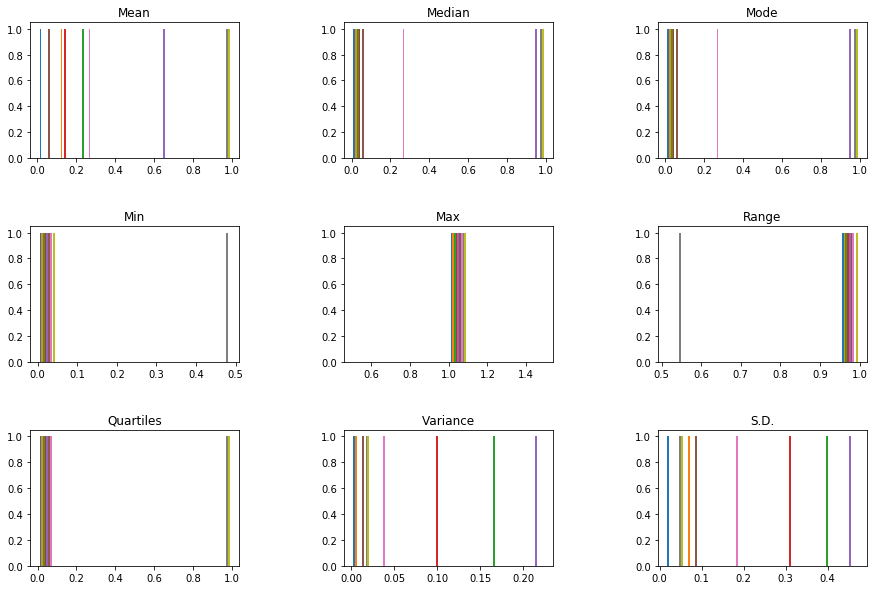

In [4]:
# 列出刪除空值前的行列數
(rows1, cols1) = app_train.shape
print(f'rows1 = {rows1}, cols1 = {cols1}')

# 刪除空值(只要每列有出現1個空值就刪除該列)
app_train2 = app_train.dropna(axis='index', how='any')

# 重設index
app_train2 = app_train2.reset_index()

# 列出刪除空值後的行列數
(rows2, cols2) = app_train2.shape
print(f'rows2 = {rows2}, cols2 = {cols2}')

# 隨便取出10個不重複的欄位
col_rand = np.random.choice(list(app_train2.head(0)), size=10, replace=False)
app_train3 = app_train2.loc[:, col_rand]

# 只保留非字串欄位
for column in app_train3.columns:
    value = app_train3.at[0, column]
    if (type(value) is str):
        try:
            pd.to_numeric(value)
        except ValueError:
            app_train3 = app_train3.drop(column, axis='columns')
            pass
(rows3, cols3) = app_train3.shape
print(f'rows3 = {rows3}, cols3 = {cols3}')
#print(app_train3.head(10))

# 建立資料量化輸出表格
index = app_train3.columns
columns = ['Mean','Median', 'Mode', 'Min', 'Max', 'Range', 'Quartiles', 'Variance', 'S.D.']
df = pd.DataFrame(index=index, columns=columns)

# 每個欄位各自計算
for column in app_train3.columns:
    # 平均值
    df['Mean'].loc[column] = app_train3[column].mean()
    # 中位數
    df['Median'].loc[column] = app_train3[column].median()
    # 眾數
    df['Mode'].loc[column] = app_train3[column].mode()[0]
    # 最⼩值
    df['Min'].loc[column] = app_train3[column].min()
    # 最⼤值
    df['Max'].loc[column] = app_train3[column].max()
    # 全距
    df['Range'].loc[column] = app_train3[column].max() - app_train3[column].min()
    # 四分位差(10%)
    df['Quartiles'].loc[column] = app_train3[column].quantile(0.1)
    # 變異數
    df['Variance'].loc[column] = app_train3[column].var()
    # 標準差
    df['S.D.'].loc[column] = app_train3[column].std()    
print(df)

# df = df.reset_index(drop=True)

plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for column in columns:
    plt.subplot((len(columns)//3) + (len(columns)%3), 3, (columns.index(column) + 1), title=column)
    df[column].hist(grid=False)